# Unit 3 Supervised Learning Capstone Project

## Predicting Forest Cover Type

By Montanna Colburn

## Abstract

What are the biggest indicators of forest floor covering, and is there a way, perhaps, to predict what it will be? 

In this report, we'll look through a study conducted in the Roosevelt National Forest of northern Colorado compromised of 581,012 30m x 30m patches of forest floor. The data was colleted by the US Forest Service (USFS) Region 2 Resource Information System (RIS) data and the Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. The data collected is from areas with minimal human disturbances, so that cover types are more likely correlated to ecological processes. In each of these patch observations, we'll look at 54 attributes, both continous and categorical variables, to aide in predicting one of the seven potential cover types. 

Dataset: https://www.kaggle.com/uciml/forest-cover-type-dataset  

This analysis will bring some insight into forest habitats, and potentially help in forest regrowth and preservation. It will also show us what supervised learning classification models are best suited to for this classification prediction. 

## Index 

* Imports 

* Data Uploading and Cleaning 

* Exploratory Data Analysis 

* Feature Engineering 

* Models 
    
   *  Logisitc Regression
  
   * Random Forest
  
   * Extreme Boost 
   * Model Comparison 
 
* Feature Importances 

* Conclusion
* Future Work

 



## Imports 

In [0]:
#basic imports
import pandas as pd
import numpy as np

#visuals 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

#cross valdiation metrics 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint as sp_randint
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm

#ignore warnings 
import warnings
warnings.filterwarnings("ignore")

#time
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Data Uploading and Review

In [0]:
#read in data
df = pd.read_csv('https://www.dropbox.com/s/alspmiuicgd12kd/covtype.csv?dl=1') 
df.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

Fantastic! No null values, which means this was well collected data. It also seems all columns are represented as an integer, so there will be minimal data cleaning we'll have to do here.

In [0]:
df.nunique()

Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               2
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10


This showcases our categorical variables vs continous variables (i.e the 4 wilderness areas and the 40 different soil types are our categorical variables).

In [0]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


## Exploratory Data Analysis

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64


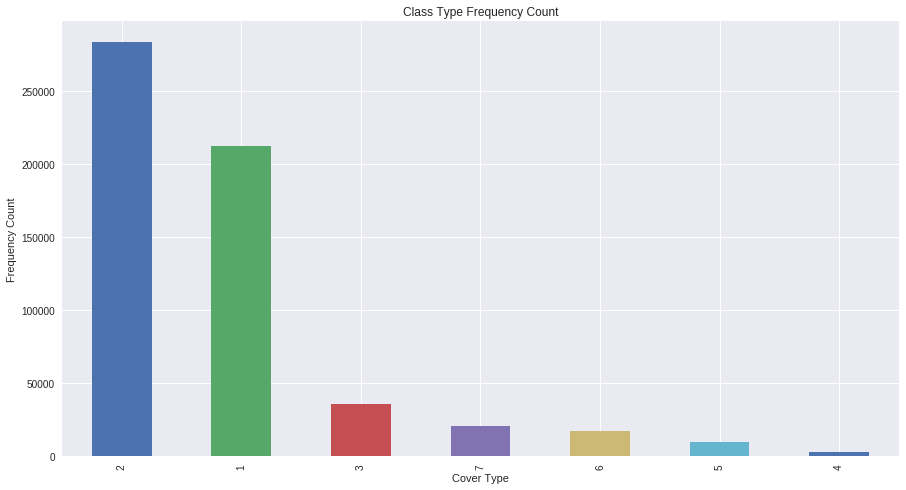

In [0]:
#set plot parameters
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.rcParams.update({'font.size': 15})

#showcase outcome distribution
df.Cover_Type.value_counts().plot(kind = "bar")
plt.xlabel('Cover Type')
plt.ylabel('Frequency Count')
plt.title('Class Type Frequency Count')
print(df.Cover_Type.value_counts())

#### Forest Cover Type Key: <br>
1.Spruce/Fir<br>
2.Lodgepole Pine<br>
3.Ponderosa Pine<br>
4.Cottonwood/Willow<br>
5.Aspen<br>
6.Douglas-fir<br>
7.Krummholz<br>

Obviously we can see there's quite a large class imbalance in this dataset. Cover_Type 1 and 2 (i.e Spruce/Fir and Lodgepole Pine) are the most heavily recorded, while the Cover_Type 4 (i.e Cottonwood/Willow) is the least. We'll have to address this when building our models. 

In [0]:
#let's separate our continous and categorical data so we can preview the distributions
cont_data=df.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
wilderness_data=df.loc[:,'Wilderness_Area1':'Wilderness_Area4']
soil_data=df.loc[:,'Soil_Type1':'Soil_Type40']
results=df['Cover_Type']

In [0]:
#add in the Cover_Type to compare against one another
cont_data=pd.concat([cont_data, results], axis=1)
wilderness_data=pd.concat([wilderness_data,results],axis=1)

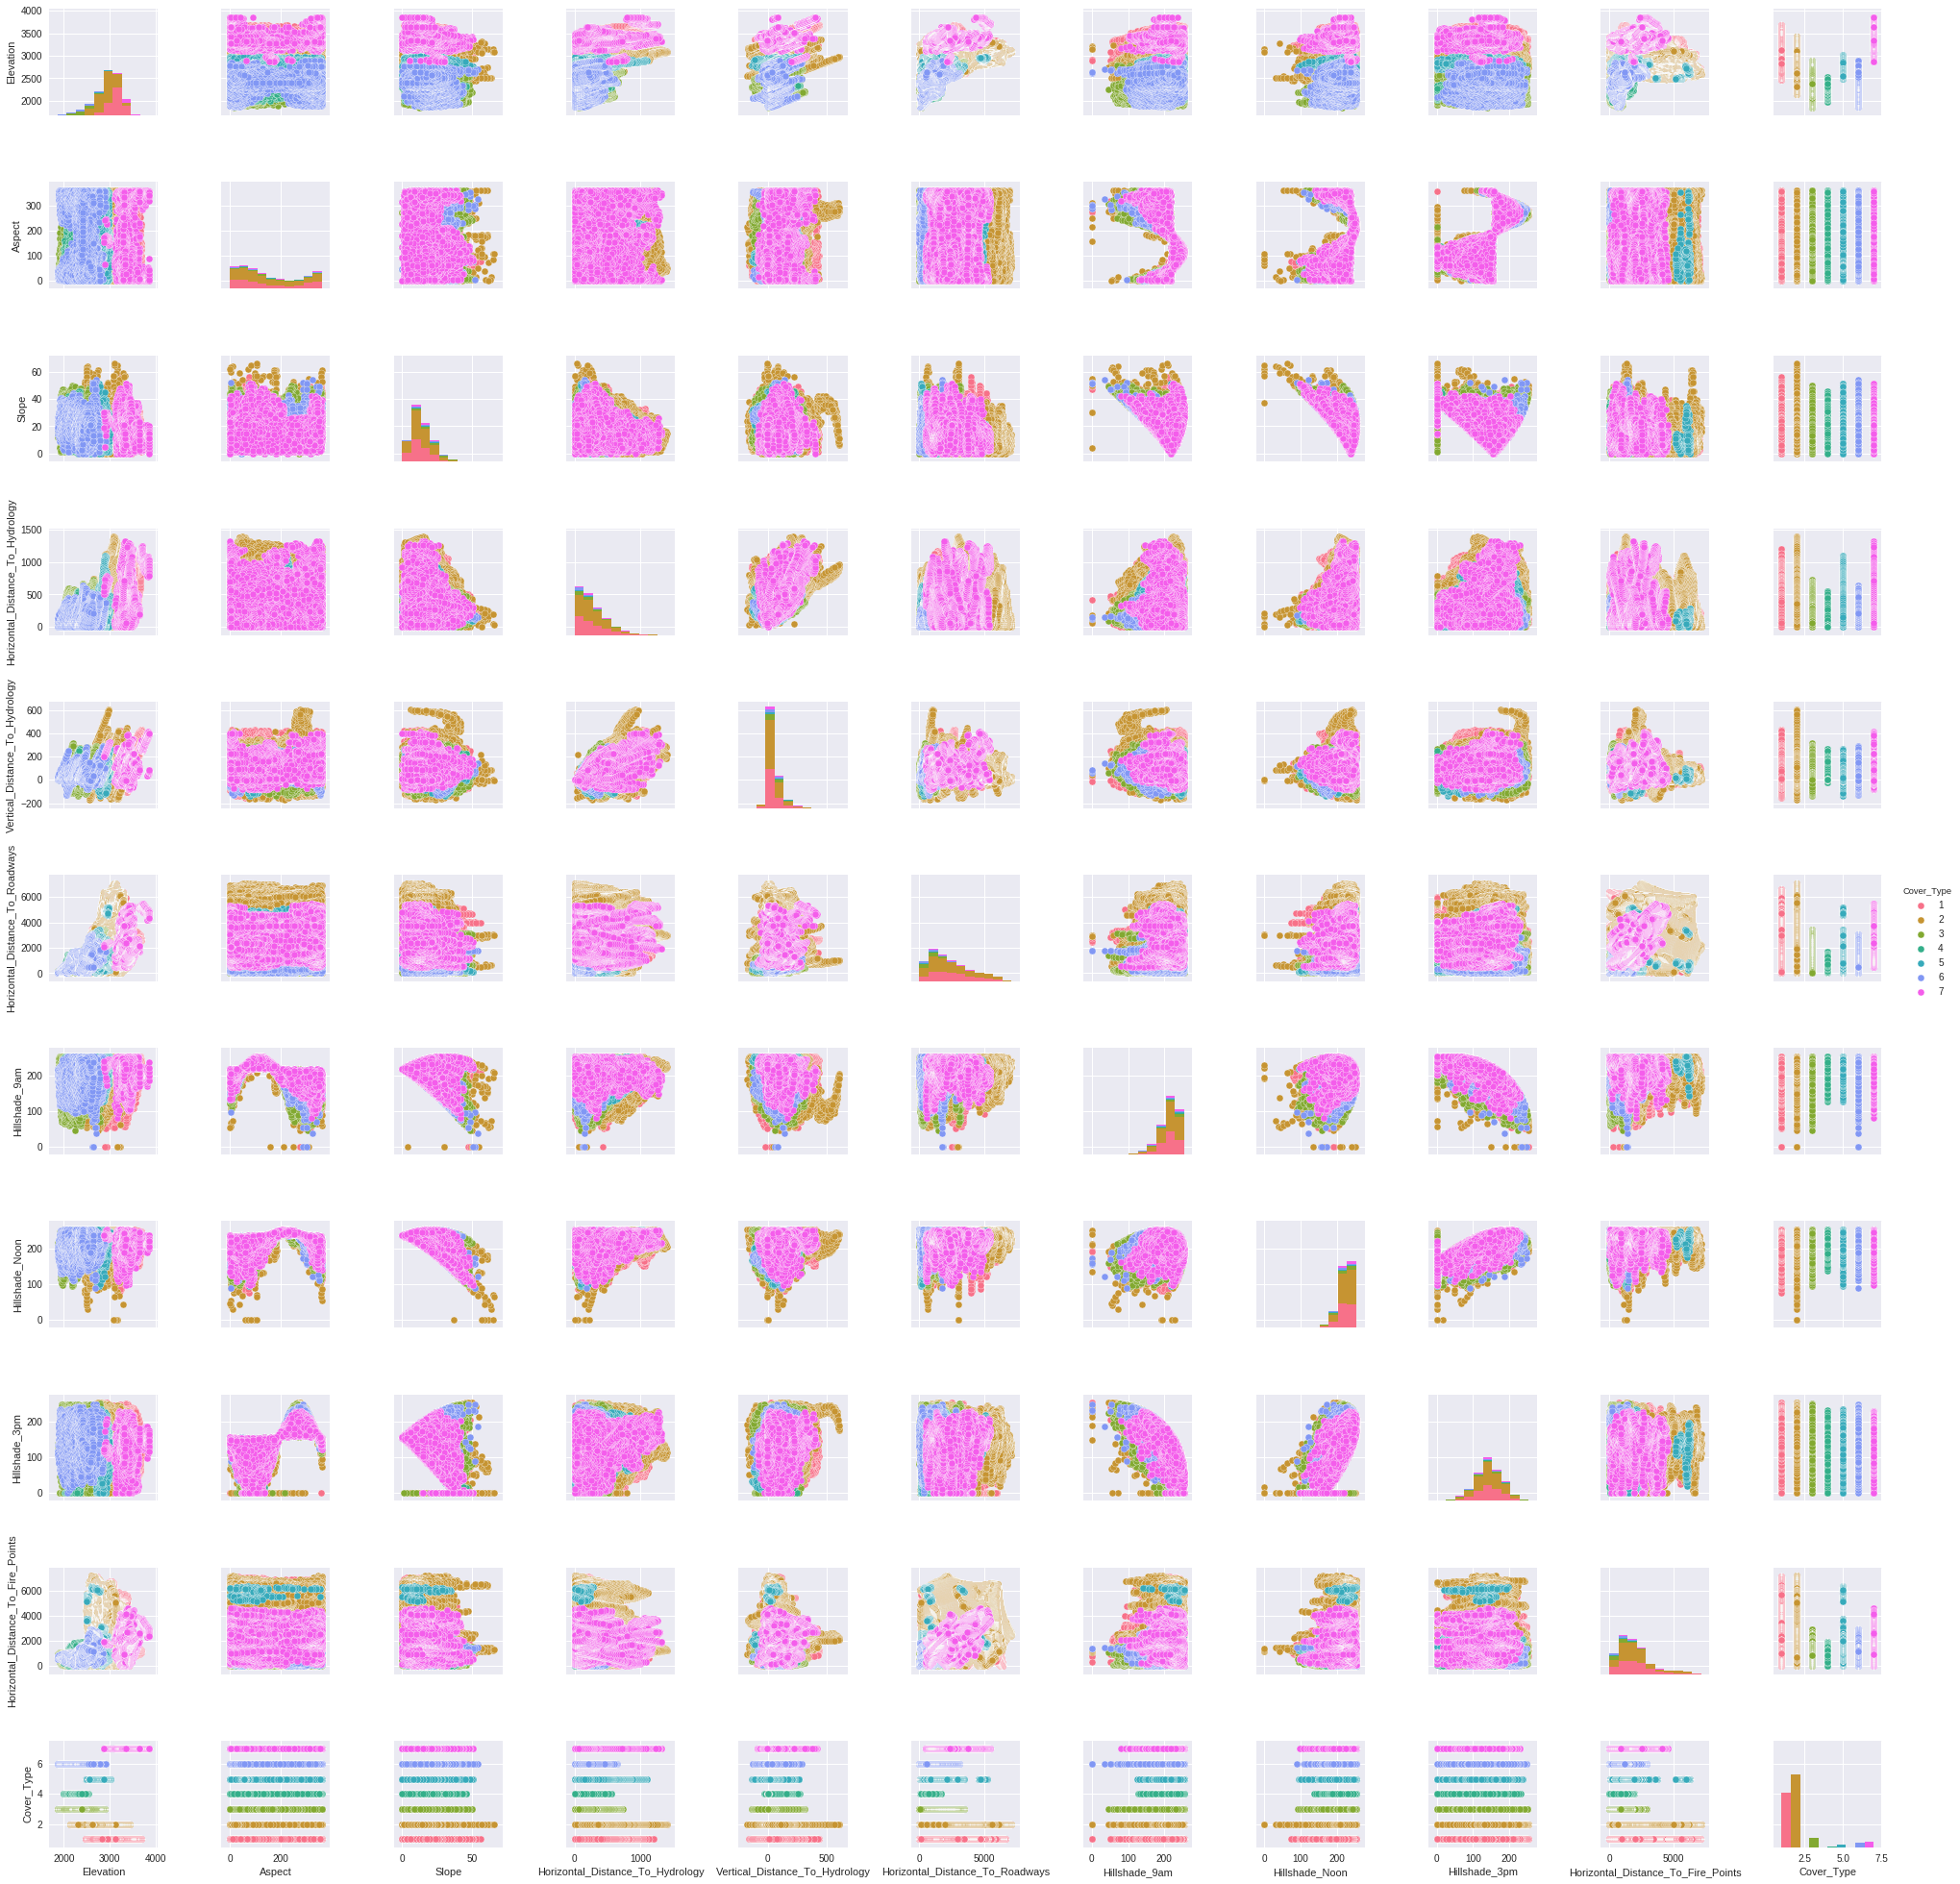

In [0]:
g = sns.pairplot(cont_data,hue='Cover_Type')

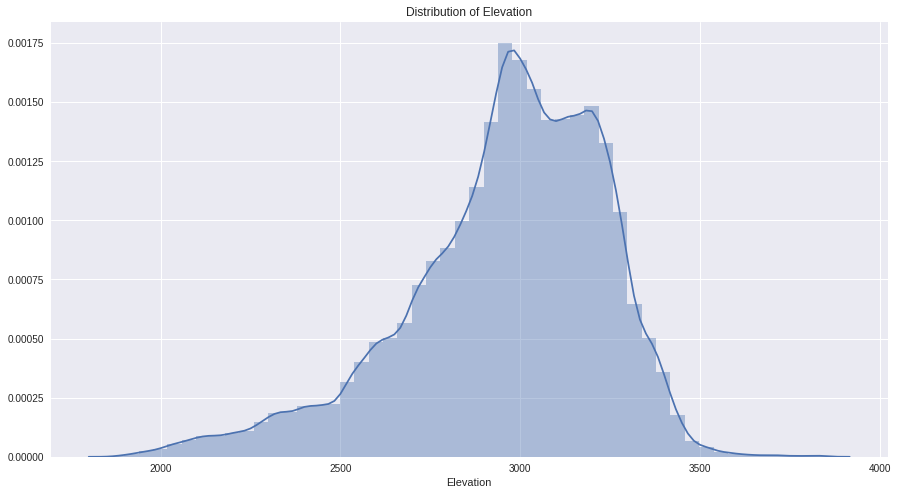

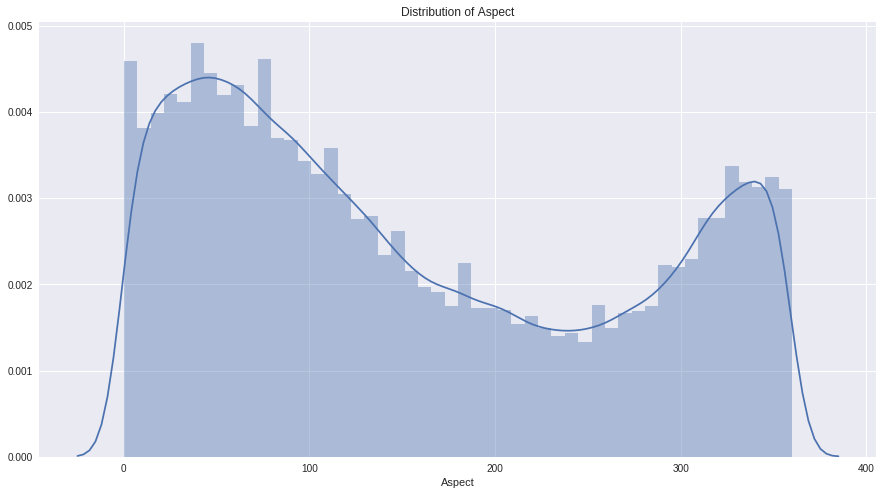

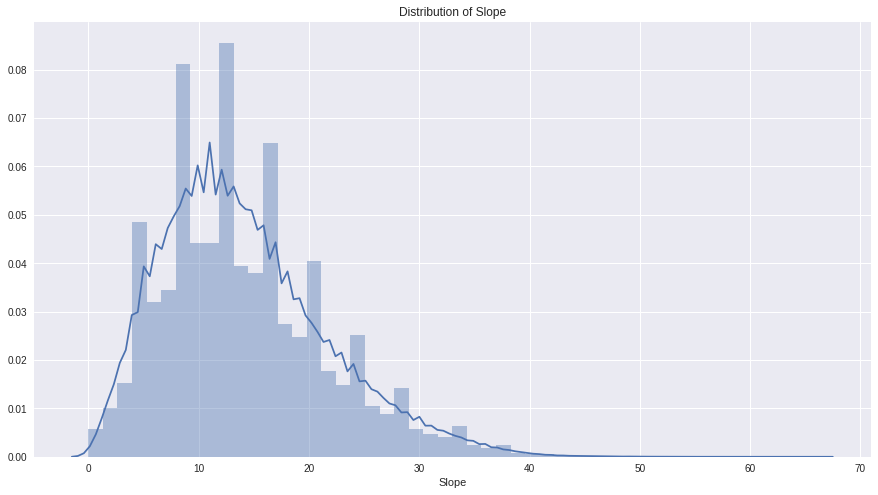

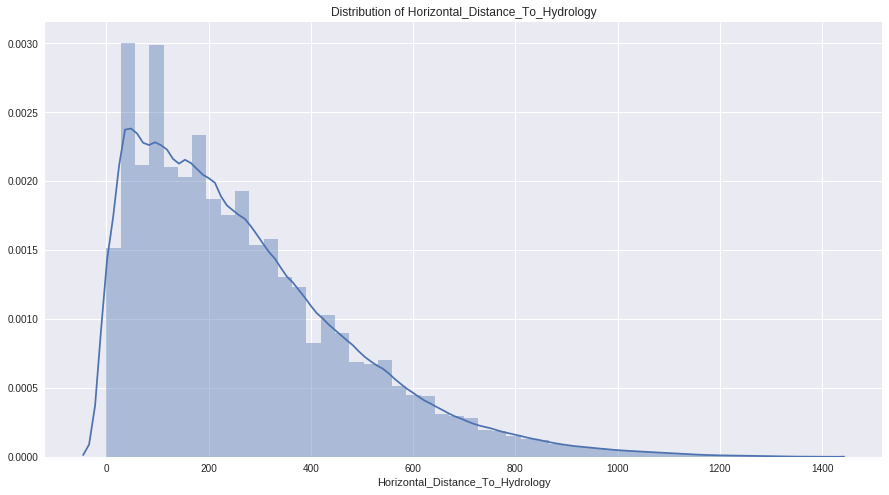

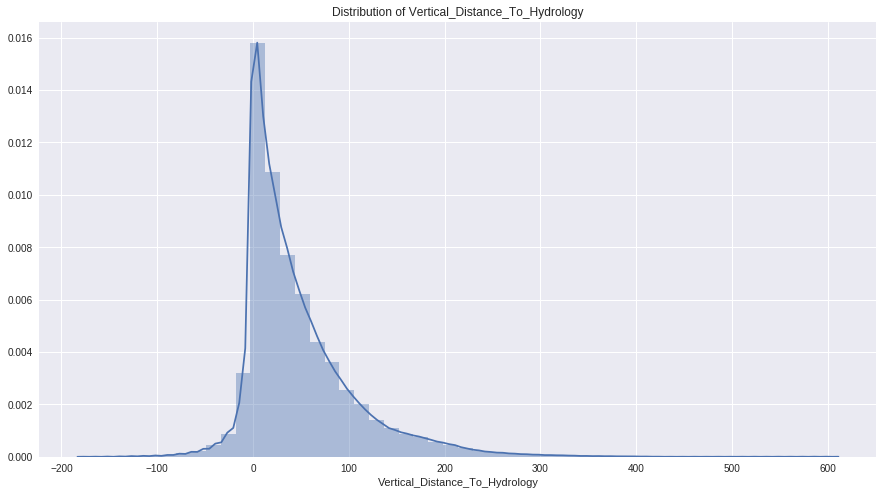

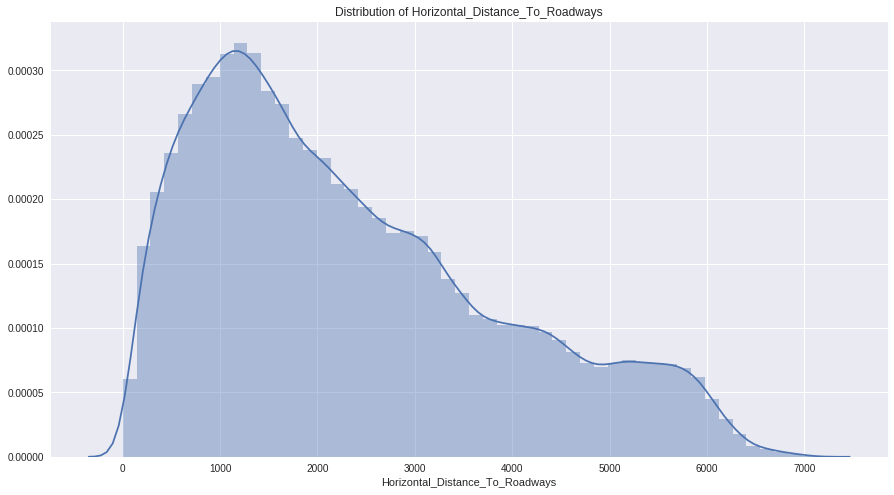

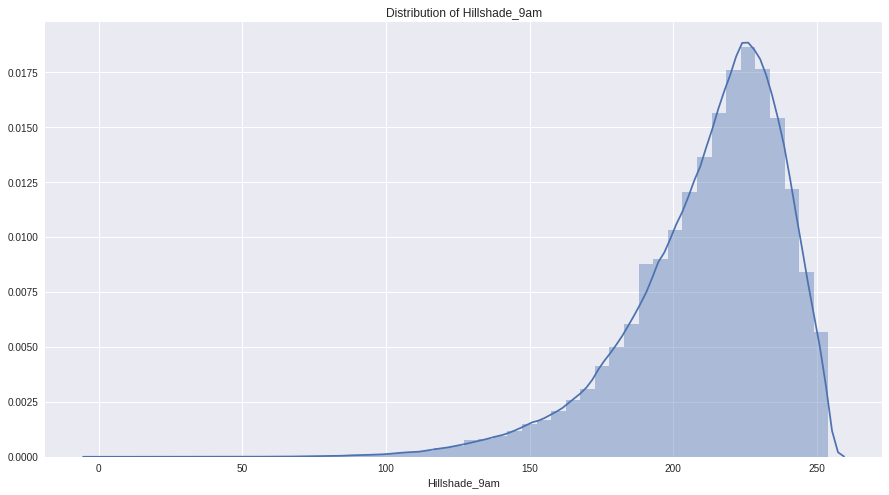

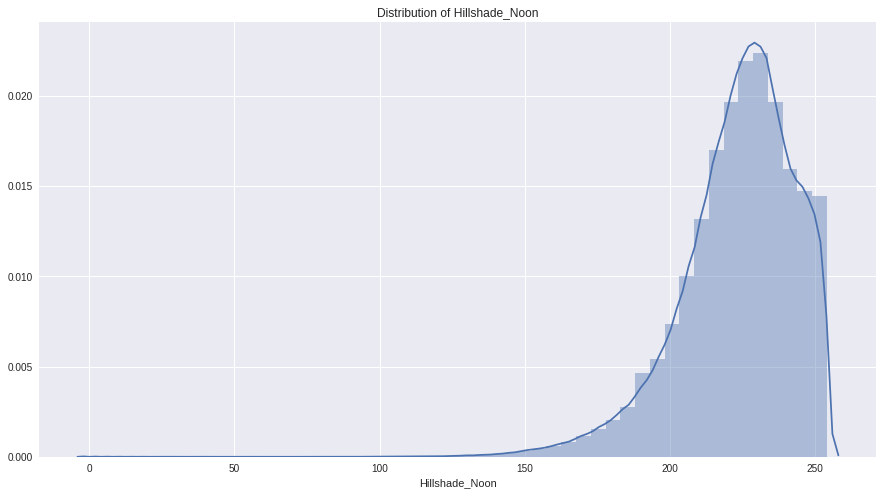

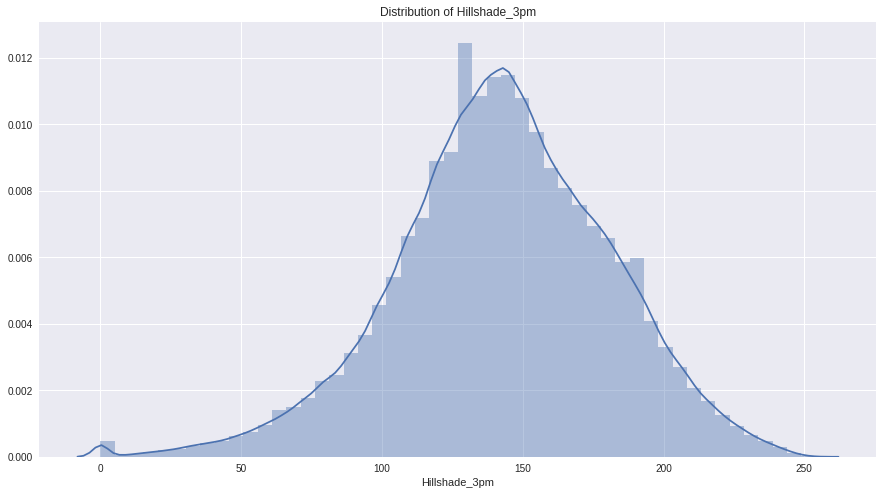

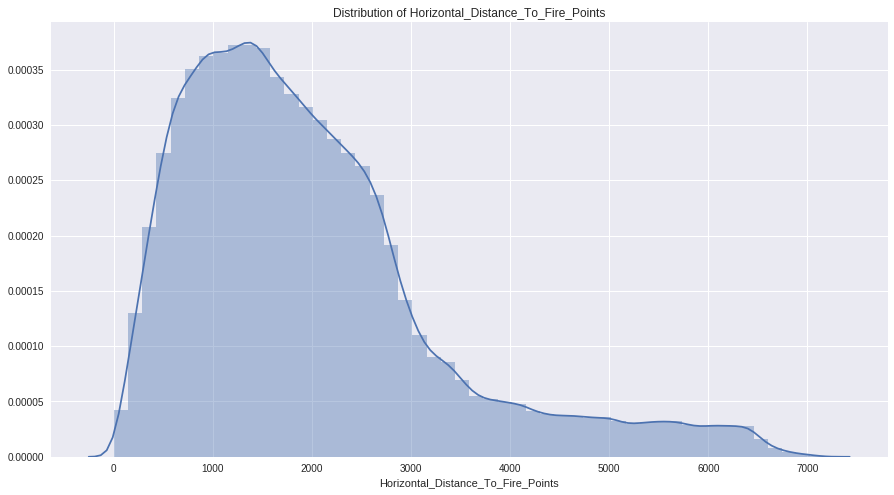

In [0]:
for i in cont_data.columns[:-1]: 
    sns.distplot(cont_data[i])
    plt.title('Distribution of {}'.format(i))
    plt.show()
    

These distributions give us better insight into the skewness that exists within these continous variables. 

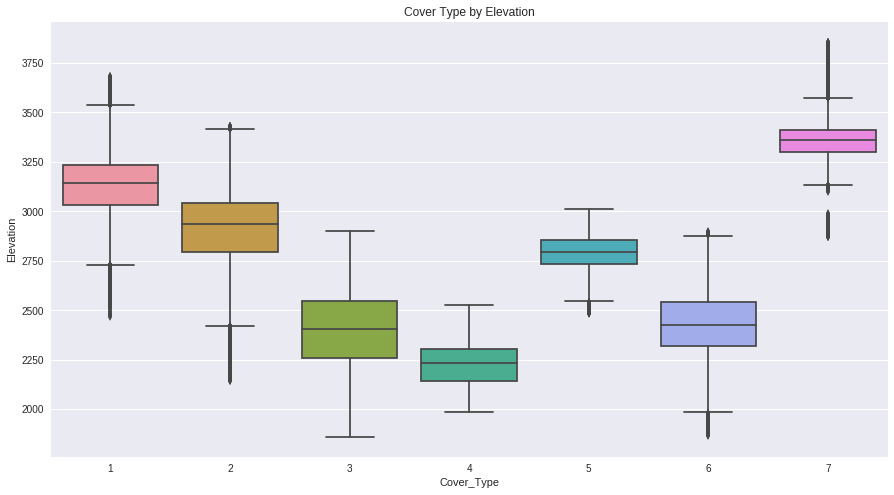

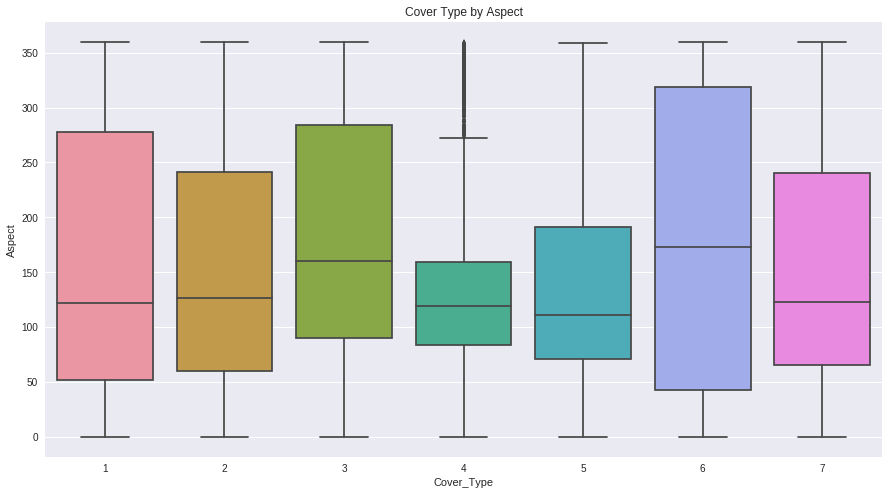

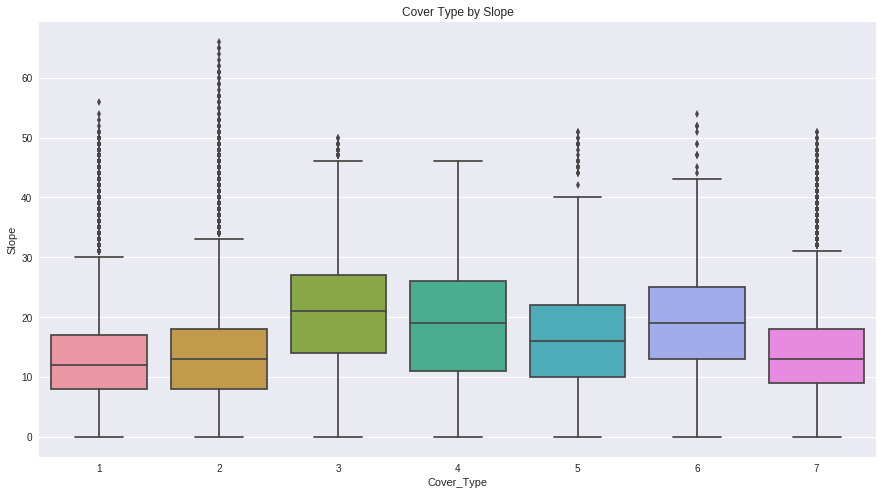

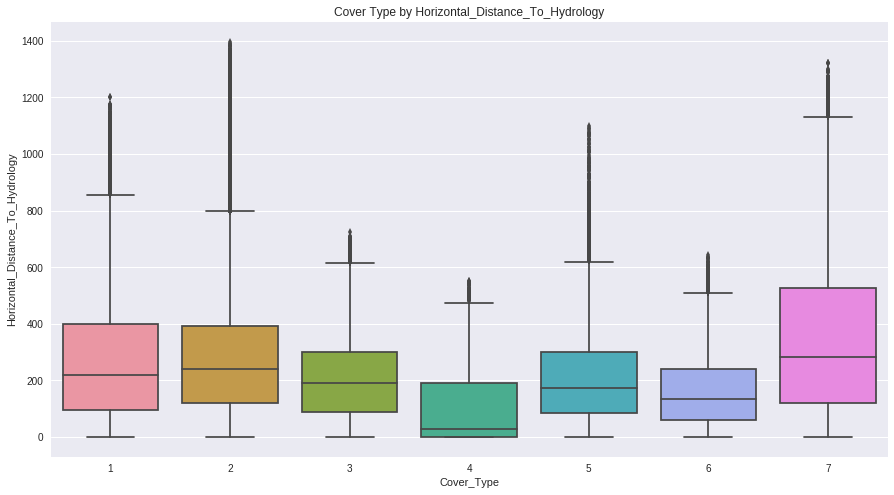

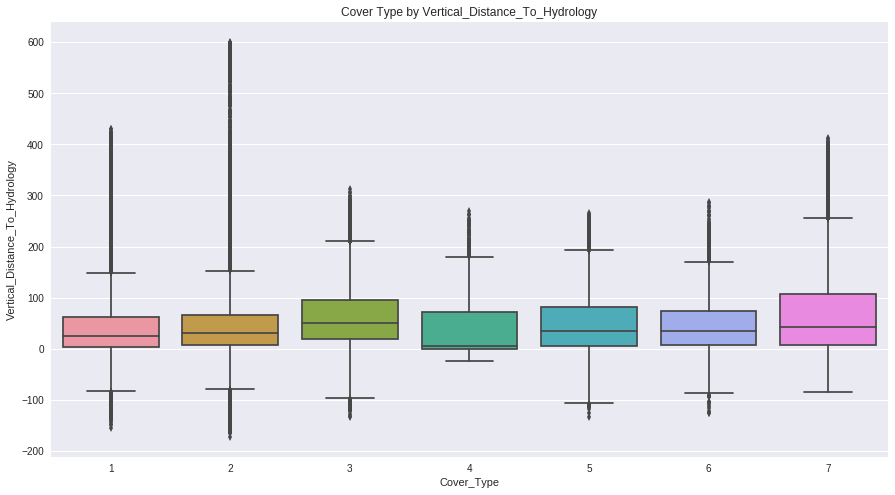

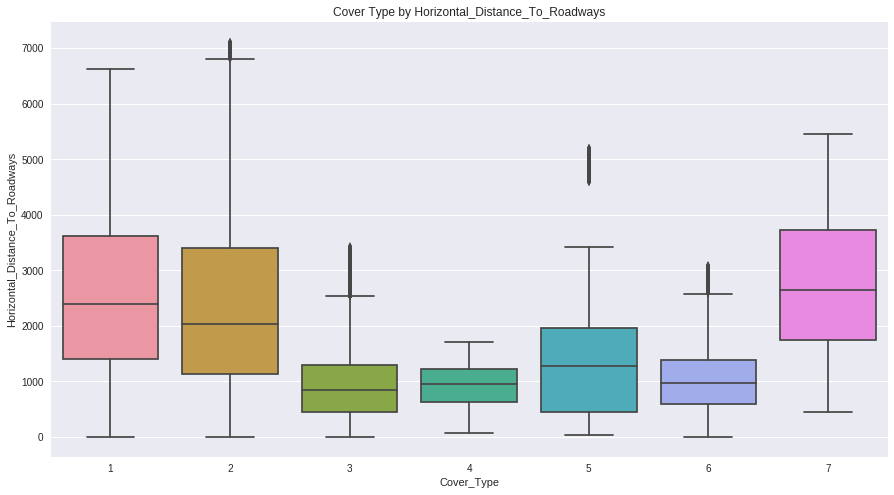

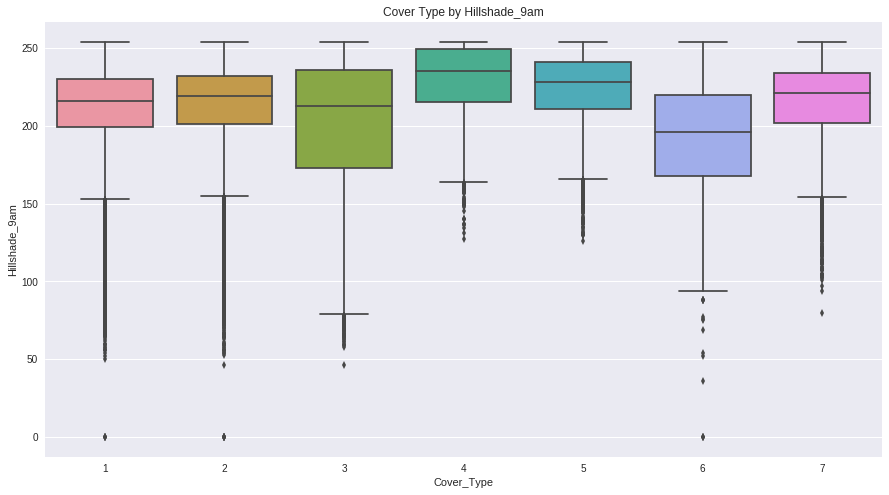

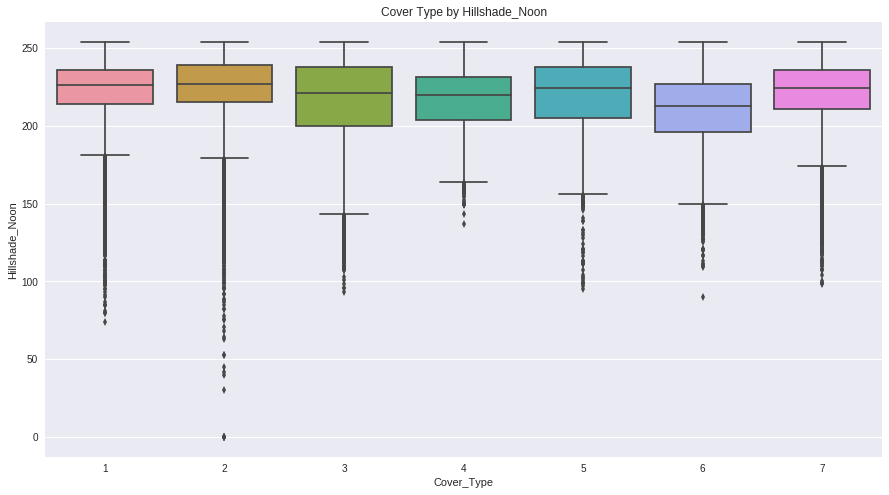

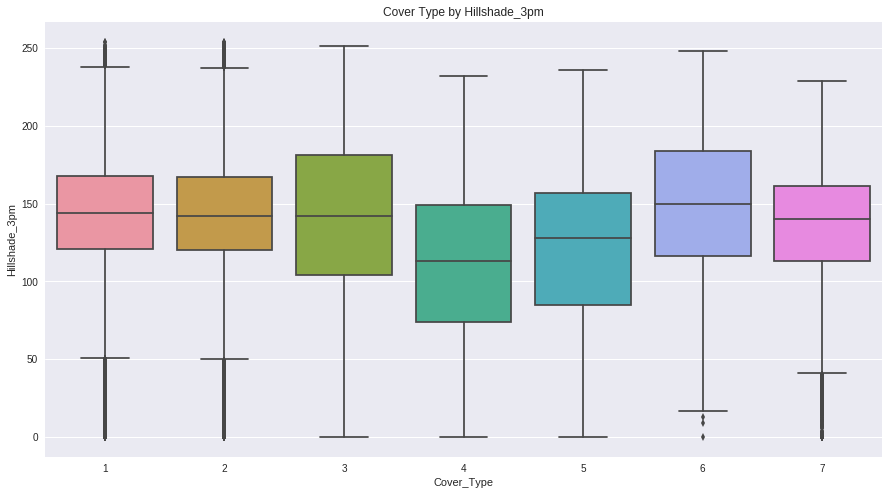

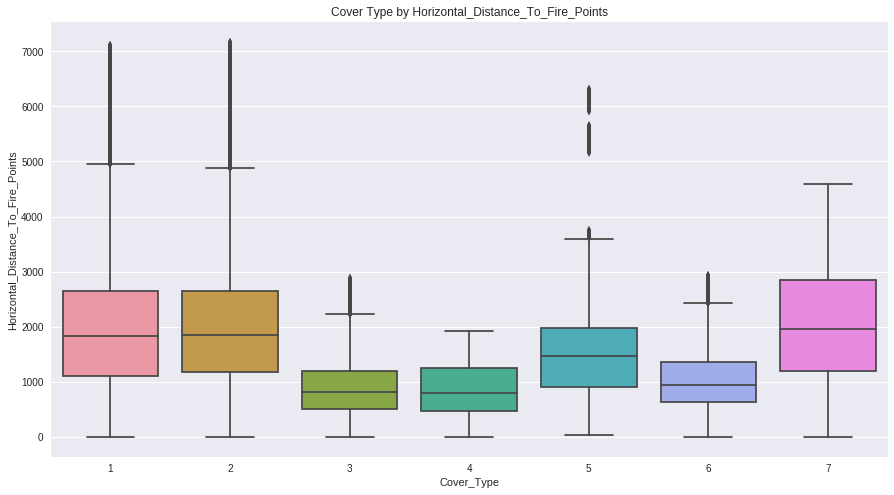

In [0]:
for i in cont_data.columns[:-1]: 
    sns.boxplot(x="Cover_Type", y=cont_data[i], data=cont_data)
    plt.title('Cover Type by {}'.format(i))
    plt.show()
   

From the above graphs, we can discern that Elevation will likely be a good indicator of our prediction variable due to the variability amongst the different floor coverings. We can also find Slope, Horizontal Distance to Roadways, and Horizontal Distance to Fire Points as good indicators.

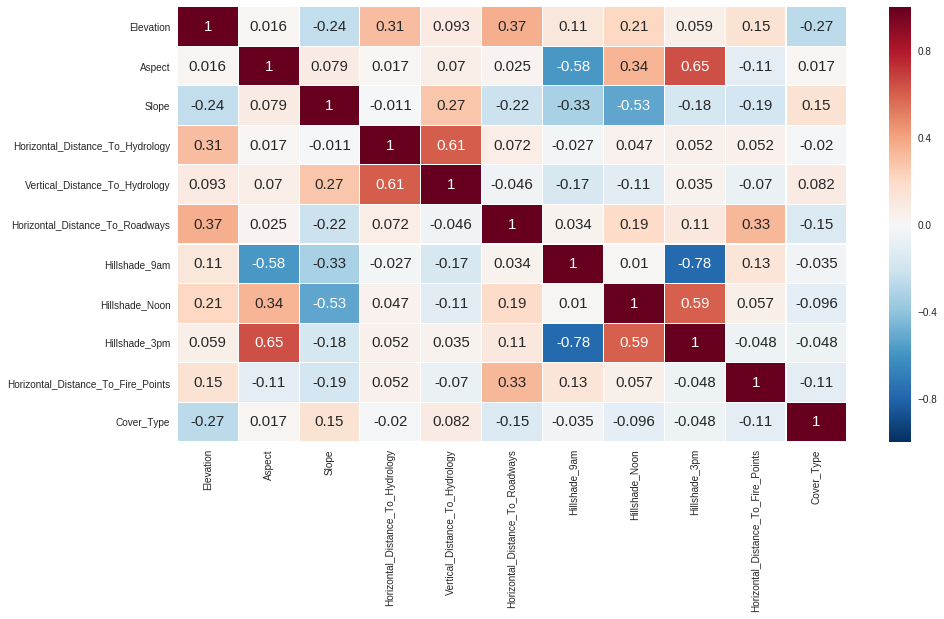

In [0]:
#Now let's check our continous variable correlation 
sns.heatmap(cont_data.corr(),linewidths=0.1, vmax=1.0,annot=True)
plt.show()

From the above correlation matrix we can see that Aspect and Hillshade_3pm are heavily correlated, Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology are heavily correlated, as well as Hillshade_Noon and Hillshade_3pm. We'll need to address this later on so we don't account for too much of the variance in the dataset and overfit our model.

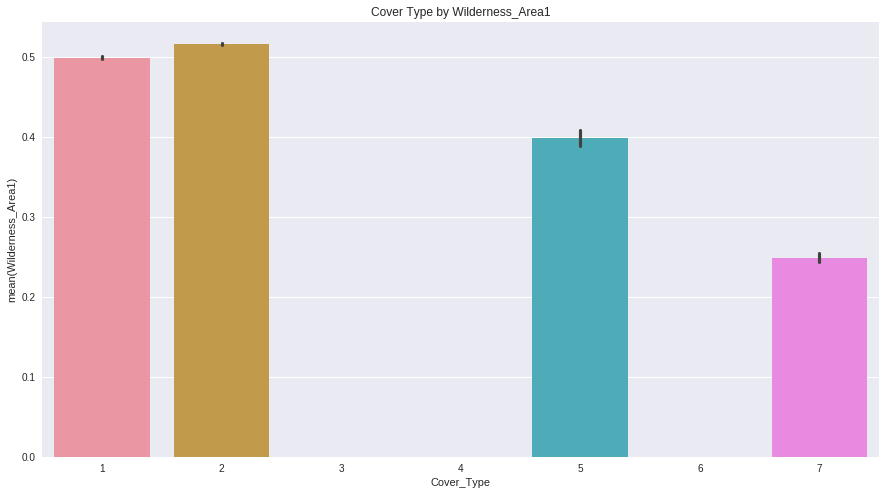

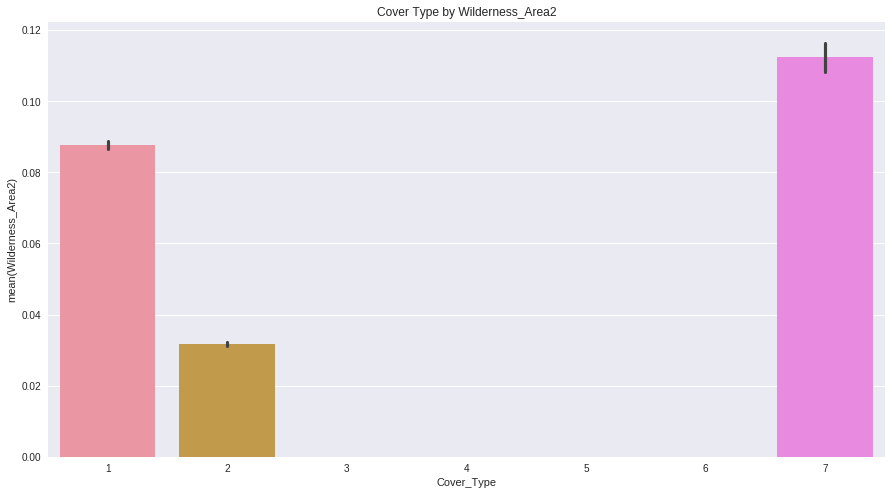

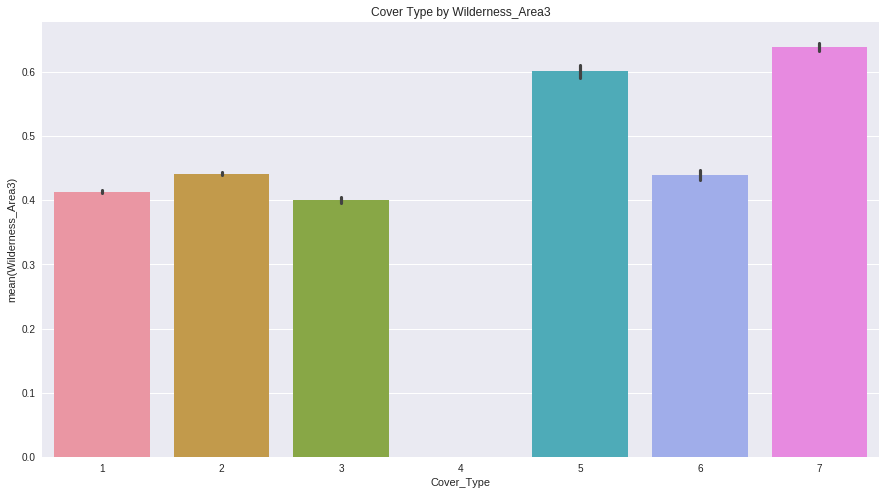

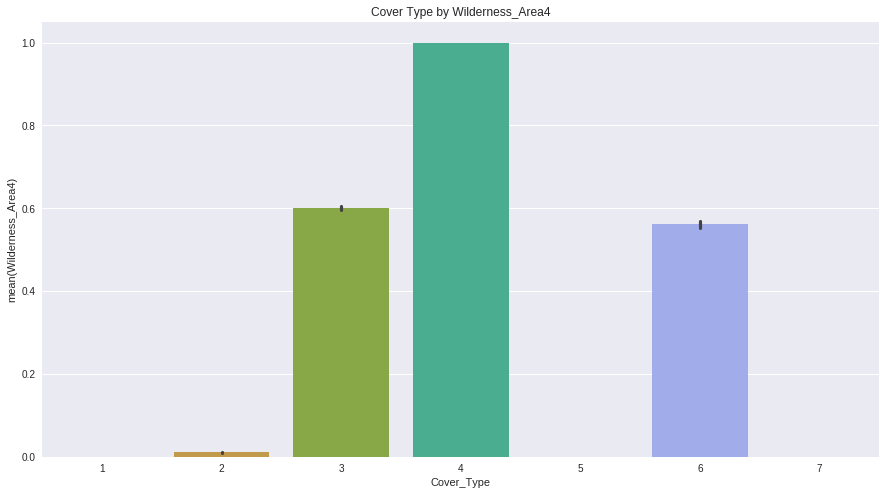

In [0]:
for i in wilderness_data.columns[:-1]:
    sns.barplot(x="Cover_Type", y=wilderness_data[i], data=wilderness_data)
    plt.title('Cover Type by {}'.format(i))
    plt.show()

#### Wilderness Area Key:

1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area


Well from the above bar graphs we can certainly see that certain Wilderness areas are more likely to have a few specific kinds of Forest Cover Type than others, so this will likely be a good indicator for our prediction model! 

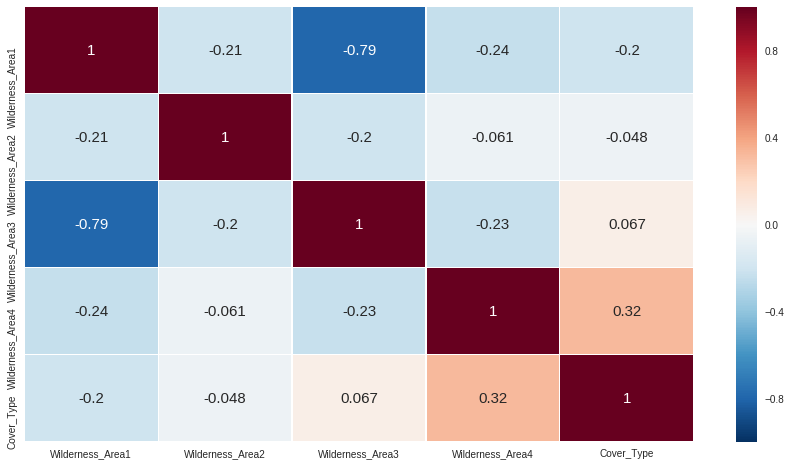

In [0]:
#let's do a quick check for variable correlation amongst the wilderness area's 
sns.heatmap(wilderness_data.corr(), linewidths=0.1, vmax=1.0, annot=True)
plt.show()

Looks pretty good, it doesn't seem that these are too very correlated, other than wilderness area 3 and 1 being a bit inversely correlated. 

In [0]:
wilderness_data.apply(pd.Series.value_counts)

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,320216.0,551128.0,327648.0,544044.0,NaN
1,260796.0,29884.0,253364.0,36968.0,211840.0
2,NaN,NaN,NaN,NaN,283301.0
3,NaN,NaN,NaN,NaN,35754.0
4,NaN,NaN,NaN,NaN,2747.0
5,NaN,NaN,NaN,NaN,9493.0
6,NaN,NaN,NaN,NaN,17367.0
7,NaN,NaN,NaN,NaN,20510.0


From the above value counts we can see that Wilderness Area 1 and 3 are more densely recorded than 2 and 4.

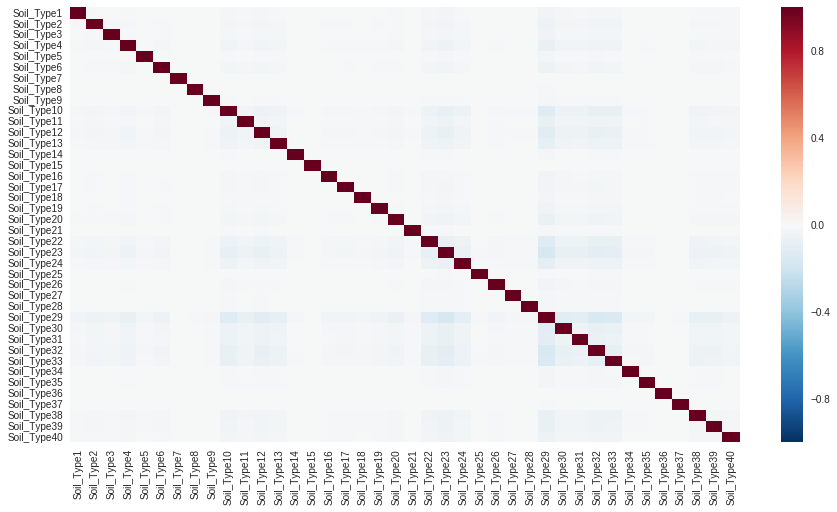

In [0]:
#let's now visualize our soil types correlation 
sns.heatmap(soil_data.corr())
plt.show()

#### Soil Type Key:

1. Cathedral family - Rock outcrop complex, extremely stony<br>
2. Vanet - Ratake families complex, very stony<br>
3. Haploborolis - Rock outcrop complex, rubbly<br>
4. Ratake family - Rock outcrop complex, rubbly<br>
5. Vanet family - Rock outcrop complex complex, rubbly<br>
6. Vanet - Wetmore families - Rock outcrop complex, stony<br>
7. Gothic family<br>
8. Supervisor - Limber families complex<br>
9. Troutville family, very stony<br>
10. Bullwark - Catamount families - Rock outcrop complex, rubbly<br>
11. Bullwark - Catamount families - Rock land complex, rubbly. 12 Legault family - Rock land complex, stony<br>
12. Unknown<br>
13. Catamount family - Rock land - Bullwark family complex, rubbly<br>
14. Pachic Argiborolis - Aquolis complex<br>
15. unspecified in the USFS Soil and ELU Survey<br>
16. Cryaquolis - Cryoborolis complex<br>
17. Gateview family - Cryaquolis complex<br>
18. Rogert family, very stony<br>
19. Typic Cryaquolis - Borohemists complex<br>
20. Typic Cryaquepts - Typic Cryaquolls complex <br>
21. Typic Cryaquolls - Leighcan family, till substratum complex<br>
22. Leighcan family, till substratum, extremely bouldery<br>
23. Leighcan family, till substratum - Typic Cryaquolls complex<br>
24. Leighcan family, extremely stony<br>
25. Leighcan family, warm, extremely stony<br>
26. Granile - Catamount families complex, very stony<br>
27. Leighcan family, warm - Rock outcrop complex, extremely stony<br>
28. Leighcan family - Rock outcrop complex, extremely stony<br>
29. Como - Legault families complex, extremely stony<br>
30. Como family - Rock land - Legault family complex, extremely stony<br>
31. Leighcan - Catamount families complex, extremely stony<br>
32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony<br>
33. Leighcan - Catamount families - Rock outcrop complex, extremely stony<br>
34. Cryorthents - Rock land complex, extremely stony<br>
35. Cryumbrepts - Rock outcrop - Cryaquepts complex<br>
36. Bross family - Rock land - Cryumbrepts complex, extremely stony<br>
37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony<br>
38. Leighcan - Moran families - Cryaquolls complex, extremely stony<br>
39. Moran family - Cryorthents - Leighcan family complex, extremely stony<br>
40. Moran family - Cryorthents - Rock land complex, extremely stony<br>

This looks great! Seems that our soil types differentiate from one another rather well.

In [0]:
soil_data.apply(pd.Series.value_counts).transpose()

,0,1
Soil_Type1,577981,3031
Soil_Type2,573487,7525
Soil_Type3,576189,4823
Soil_Type4,568616,12396
Soil_Type5,579415,1597
Soil_Type6,574437,6575
Soil_Type7,580907,105
Soil_Type8,580833,179
Soil_Type9,579865,1147
Soil_Type10,548378,32634


Ah, so it seems that there's also some skewness in the distribution of our different soil types. 

## Feature Engineering

In [0]:
#we'll do some minor feature engineering by combining some correlated variables
#but won't quite replace the originals with them seeing as the correlations are very low  

means_1 = df[['Hillshade_3pm','Hillshade_9am']].mean(axis=0)
stds_1 = df[['Hillshade_3pm','Hillshade_9am']].std(axis=0)
df['Hillsade_3pm_9am'] = ((df[['Hillshade_3pm','Hillshade_9am']] - means_1) / stds_1).mean(axis=1)

means_2 = df[['Hillshade_3pm','Aspect']].mean(axis=0)
stds_2 = df[['Hillshade_3pm','Aspect']].std(axis=0)
df['Hillsade_3pm_Aspect'] = ((df[['Hillshade_3pm','Aspect']] - means_2) / stds_2).mean(axis=1)

means_3 = df[['Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Hydrology']].mean(axis=0)
stds_3 = df[['Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Hydrology']].std(axis=0)
df['Vertical_Horizontal_Distance_To_Hydrology'] = ((df[['Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Hydrology']] - means_3) / stds_3).mean(axis=1)

## Models

In [0]:
#create training/test sets
X = df.drop('Cover_Type', axis=1)
y = df.Cover_Type

#split out training/test data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=51)

#split training set again to test best params with reduce execution times 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train,y_train, test_size=0.8, random_state=51)

### Logistic Regression

In [0]:
#basic log model
log_model = LogisticRegression(class_weight = 'balanced', random_state=51, n_jobs=-1)
log_model.fit(X_train2,y_train2)

cross_val_score(log_model, X_train2, y_train2, cv=5)

array([0.64608655, 0.66651129, 0.65699738, 0.67722154, 0.65584881])

In [0]:
#fine tune parameters 
param_dist = {'C': [1000, 1200, 1400, 1600, 1800], 
             'penalty': ['l1', 'l2']}
random_search1 = RandomizedSearchCV(LogisticRegression(class_weight = 'balanced',random_state=51, n_jobs= -1), param_distributions=param_dist, n_iter=8)
random_search1.fit(X_train2, y_train2)
print('Best Score:', random_search1.best_score_)
best_params_random_search1 = random_search1.best_params_
print('Best Parameters:', best_params_random_search1)

Best Score: 0.6861694689170728
Best Parameters: {'penalty': 'l1', 'C': 1600}


In [0]:
#initiate model with best params 
log2 = LogisticRegression(**best_params_random_search1, class_weight = 'balanced', random_state=51, n_jobs=-1)
log2.fit(X_train, y_train)

#test accuracy of logistic regression with updated params
start_time = time.time()
print(log2.score(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

0.684612273349225
--- 0.2860429286956787 seconds ---


In [0]:
from sklearn.metrics import classification_report

sk_log_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=log2.predict(X_test))
print('\nClasification report:\n', sk_log_report)

sk_log_report2 = confusion_matrix(y_true=y_test, y_pred=log2.predict(X_test))

print('\nConfusion Matrix:\n',sk_log_report2)


Clasification report:
               precision    recall  f1-score   support

           1   0.698978  0.675273  0.686921     42254
           2   0.775744  0.703839  0.738044     56780
           3   0.621328  0.708017  0.661846      7110
           4   0.332690  0.652174  0.440613       529
           5   0.205866  0.383455  0.267903      1922
           6   0.346995  0.469405  0.399023      3481
           7   0.513749  0.801308  0.626089      4127

   micro avg   0.684612  0.684612  0.684612    116203
   macro avg   0.499336  0.627639  0.545777    116203
weighted avg   0.704791  0.684612  0.691531    116203


Confusion Matrix:
 [[28533 10013    36     0   502   259  2911]
 [11471 39964  1504    19  2100  1504   218]
 [    0   276  5034   504    91  1205     0]
 [    0     0   130   345     0    54     0]
 [   26   932   173     0   737    53     1]
 [    0   320  1208   169   150  1634     0]
 [  791    12    17     0     0     0  3307]]


In [0]:
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average) 

multiclass_roc_auc_score(y_test, log2.predict(X_test))

0.7799067448276092

### Random Forest Model

In [0]:
#basic random forest model 
rfc = RandomForestClassifier(class_weight = 'balanced_subsample', random_state=51)
rfc.fit(X_train2, y_train2)

cross_val_score(rfc, X_train2, y_train2, cv=5)

array([0.86205227, 0.86834463, 0.86182229, 0.86332831, 0.86416698])

In [0]:
#specify parameters and distributions to sample from
param_dist = {"n_estimators":[500,700,900],
              "max_features": sp_randint(1, 11),
              "min_samples_split": [3,4,5],
              "bootstrap": [True, False]}
random_search2 = RandomizedSearchCV(RandomForestClassifier(class_weight ='balanced_subsample', random_state=51), param_distributions=param_dist,
                                   n_iter=10)
random_search2.fit(X_train2, y_train2)
print('Best Score:', random_search2.best_score_)
best_params_random_search2= random_search2.best_params_
print('Best Parameters:', best_params_random_search2)

Best Score: 0.9011520960402749
Best Parameters: {'bootstrap': False, 'max_features': 8, 'min_samples_split': 4, 'n_estimators': 500}


In [0]:
#initiate model with best params 
rfc2 = RandomForestClassifier(**best_params_random_search2, class_weight ='balanced_subsample', random_state=51)
rfc2.fit(X_train, y_train)

#test accuracy of Random Forest with updated params 
start_time = time.time()
print(rfc2.score(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

0.9606034267617876
--- 36.92564153671265 seconds ---


In [0]:
sk_rfc_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=rfc2.predict(X_test))
print('\nClasification report:\n', sk_rfc_report)

sk_rfc_report2 = confusion_matrix(y_true=y_test, y_pred=rfc2.predict(X_test))

print('\nConfusion Matrix:\n',sk_rfc_report2)


Clasification report:
               precision    recall  f1-score   support

           1   0.968962  0.951602  0.960203     42254
           2   0.959278  0.973723  0.966447     56780
           3   0.946170  0.964135  0.955068      7110
           4   0.888889  0.892250  0.890566       529
           5   0.927077  0.853278  0.888648      1922
           6   0.921449  0.913243  0.917328      3481
           7   0.976938  0.964866  0.970864      4127

   micro avg   0.960603  0.960603  0.960603    116203
   macro avg   0.941252  0.930442  0.935589    116203
weighted avg   0.960638  0.960603  0.960534    116203


Confusion Matrix:
 [[40209  1945     4     0     7     4    85]
 [ 1136 55288   123     2   112   110     9]
 [    1    68  6855    41     9   136     0]
 [    0     0    45   472     0    12     0]
 [   17   234    22     0  1640     9     0]
 [    5    85   196    16     0  3179     0]
 [  129    15     0     0     1     0  3982]]


In [0]:
multiclass_roc_auc_score(y_test, rfc2.predict(X_test))

0.9605518598460694

### Extreme Boost Classifier

In [0]:
#initiating and fitting the model
xgb_model = xgb.XGBClassifier(learning_rate = .01, random_state=51)
xgb_model.fit(X_train2, y_train2) 

cross_val_score(xgb_model, X_train2, y_train2, cv=5)

array([0.7013015 , 0.69984941, 0.69755809, 0.69658993, 0.69293668])

In [0]:
#fine tune parameters 
param_dist = {'max_depth':[5,7,9],
              'subsample':[0.5,0.7,0.9],
              'colsample_bytree': [0.5,0.7,0.9],
            'colsample_bylevel':[0.5,0.7,0.9]}
random_search3 = RandomizedSearchCV(xgb.XGBClassifier(learning_rate =.01, random_state=51), param_distributions=param_dist,
                                   n_iter=10)
random_search3.fit(X_train2, y_train2)
print('Best Score:', random_search3.best_score_)
best_params_random_search3= random_search3.best_params_
print('Best Parameters:', best_params_random_search3)

Best Score: 0.8099525607512827
Best Parameters: {'subsample': 0.7, 'max_depth': 9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.9}


In [0]:
#initiate model with best params 
xgb_model2 = xgb.XGBClassifier(**best_params_random_search3, random_state=51)
xgb_model2.fit(X_train, y_train)

#test accuracy of gradient boost classifier with updated params
start_time = time.time()
print(xgb_model2.score(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

0.8861475177060834
--- 9.213517189025879 seconds ---


In [0]:
sk_xgb_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=xgb_model2.predict(X_test))
print('\nClasification report:\n', sk_xgb_report)

sk_xgb_report2 = confusion_matrix(y_true=y_test, y_pred=xgb_model2.predict(X_test))

print('\nConfusion Matrix:\n',sk_xgb_report2)


Clasification report:
               precision    recall  f1-score   support

           1   0.886283  0.855848  0.870800     42254
           2   0.878556  0.917471  0.897592     56780
           3   0.905900  0.911252  0.908568      7110
           4   0.899431  0.896030  0.897727       529
           5   0.917424  0.578044  0.709224      1922
           6   0.873270  0.815570  0.843434      3481
           7   0.961907  0.923916  0.942529      4127

   micro avg   0.886148  0.886148  0.886148    116203
   macro avg   0.903253  0.842590  0.867125    116203
weighted avg   0.886579  0.886148  0.885380    116203


Confusion Matrix:
 [[36163  5936     2     0     8     2   143]
 [ 4314 52094   167     0    88   109     8]
 [    0   304  6479    38     3   286     0]
 [    0     0    45   474     0    10     0]
 [   17   760    29     0  1111     5     0]
 [    8   188   430    15     1  2839     0]
 [  301    13     0     0     0     0  3813]]


In [0]:
multiclass_roc_auc_score(y_test, xgb_model2.predict(X_test))

0.9072641409037657

### Model Comparison

In [0]:
#create table displaying all model results comapartively 
log2_score = log2.score(X_test, y_test)
rfc2_score = rfc2.score(X_test, y_test)
xgb2_score = (xgb_model2.score(X_test, y_test))

log2_auc = multiclass_roc_auc_score(y_test, log2.predict(X_test))
rfc2_auc = multiclass_roc_auc_score(y_test, rfc2.predict(X_test)) 
xgb2_auc = multiclass_roc_auc_score(y_test, xgb_model2.predict(X_test)) 

scores_list = [['Logistic_Regression', log2_score, log2_auc],
             ['Random_Forest', rfc2_score, rfc2_auc],
             ['Extreme_Boost', xgbc2_score, xgb2_auc]]
scores = pd.DataFrame(scores_list, columns=['Model','Test_Accuracy', 'AUC Scores'])
scores.sort_values('Test_Accuracy', ascending=False)

,Model,Test_Accuracy,AUC Scores
1,Random_Forest,0.960603,0.960552
2,Extreme_Boost,0.886148,0.907264
0,Logistic_Regression,0.684612,0.779907


## Feature Importances

### Random Forest 

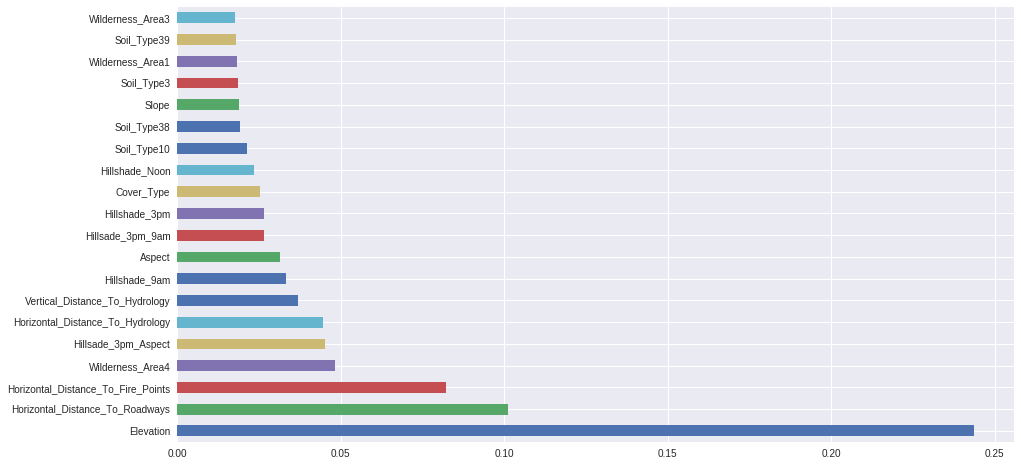

In [0]:
#plot feature importances for random forest model 
feat_importances = pd.Series(rfc2.feature_importances_, index=df.columns[:57])
feat_importances.nlargest(20).plot(kind='barh')

### Extreme Boost

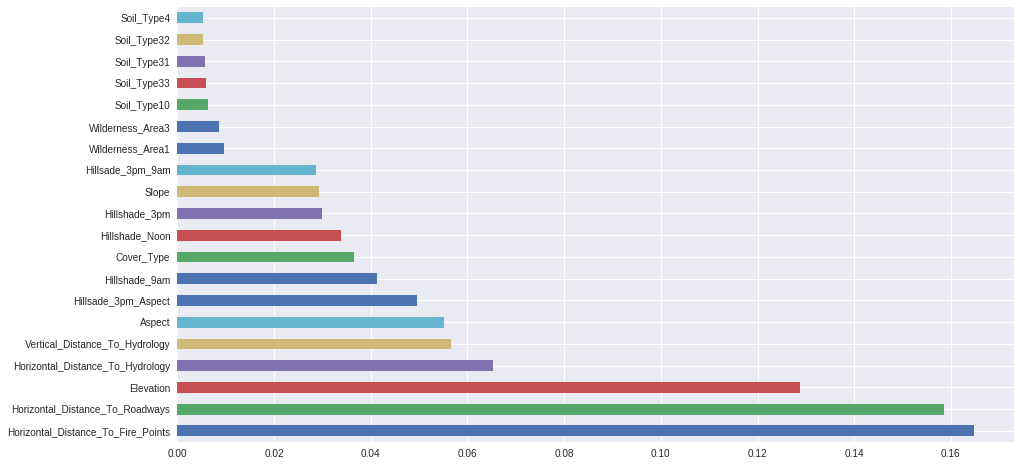

In [0]:
#plot feature importances for extreme boost model
feat_importances = pd.Series(xgb_model2.feature_importances_, index=df.columns[:57])
feat_importances.nlargest(20).plot(kind='barh')

## Conclusion 

The purpose of this study was to determine what attributes are correlated with forest cover types, and to figure out what supervised learning classifier would perform best in predicting the forest cover type. 

We can see that our top three important features amongst both our Random Forest and Extreme Boost Classifier were Elevation, Horizontal Distance to nearest roadway, and the Horizontal Distance to nearest wildfire ignition point. 

Our top performing model was certainly Random Forest with a 96.06%  on the test set and an average of 96.05% AUC score, though with the longest execution time. Logisitc regression proved to be the least effective predictor with a score of only 68.46% on the test set, though quicker than the rest in speed. 

## Future Work 

Going forward, I would select the best features we found through our Extreme Boost and Random Forest model in an attempt to achieve the same results with less computational power neccessary from dimensionality reduction. 

I would also attempt to adjust the tuning parameters on the extreme boosting model, considering the max values ended up as our best params, to see if we could perhaps surpass the score of our Random Forest Classifier. 